# Predicting Income(>50k and <=50k) based on the Census Income data

In [107]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [108]:
#Reading the dataset for the assignment given
df = pd.read_csv("adult.csv",skipinitialspace=True)

In [109]:
#Checking the 1st five rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [110]:
#Checking the dataframe's attributes properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [111]:
#Profiling the numerical columns of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [112]:
#RowsXColumns
df.shape

(32561, 15)

In [113]:
#Columns names
columns = df.columns
columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [114]:
#Unique values for each column in the dataframe
for col in df.columns:
    print("{} attribute:".format(col))
    print("{}".format(df[col].unique()),"\n")

age attribute:
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87] 

workclass attribute:
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] 

fnlwgt attribute:
[ 77053 132870 186061 ...  34066  84661 257302] 

education attribute:
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool'] 

education.num attribute:
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1] 

marital.status attribute:
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation attribute:
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Tran

In [115]:
#Stripping the blanks & replacing the missing values with Nan
for column in df.columns:
    df[column] = df[column].astype(str).str.strip() 
df = df.replace("?",np.nan)

#Method to check if the string contains a numerical value
def is_number_tryexcept(s):
    """ Returns True is string is a number. """
    try:
        float(s)
        return True
    except ValueError:
        return False

#Segregating dataframe based on the type of columns
categorical_columns = []
numeric_columns = []
for c in df.columns:
    for element in df[c].value_counts(dropna=True, sort=True)[:1].index.values.tolist():
        if is_number_tryexcept(element):
            numeric_columns.append(c)
        else:
            categorical_columns.append(c)

#Applying the datatype as per the type of the column            
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_numerical_features = df[numeric_columns].copy() 

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))

df_categorical_features =df[categorical_columns].copy()
df_categorical_features = df[categorical_columns].copy() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null category
fnlwgt            32561 non-null int64
education         32561 non-null category
education.num     32561 non-null int64
marital.status    32561 non-null category
occupation        30718 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null category
income            32561 non-null category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [116]:
#Checking for the null columns
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [117]:
#Imputing the missing values in the categorical columns with most frequently occurring values.
#Note numerical attributes are not having any missing values
cols = ['workclass','occupation','native.country']
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [118]:
#validating if imputation is successful
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [119]:
#Checking for skew within the dataset with respect to income distribution
records = len(df)
greater_than_50k = len(df.query('income == ">50K"'))
less_than_equal_50k = len(df.query('income == "<=50K"'))
#Percentage of individuals's income exceeds $50,000
greater_than_50k_percent = (float(greater_than_50k) / records * 100)

print("Total number of records: {}".format(records))
print("Individuals's income exceeds $50,000: {}".format(greater_than_50k))
print("Individuals's income is at the most $50,000: {}".format(less_than_equal_50k))
print("Percentage of individuals's income exceeds $50,000: {:.2f}%".format(greater_than_50k_percent))

Total number of records: 32561
Individuals's income exceeds $50,000: 7841
Individuals's income is at the most $50,000: 24720
Percentage of individuals's income exceeds $50,000: 24.08%


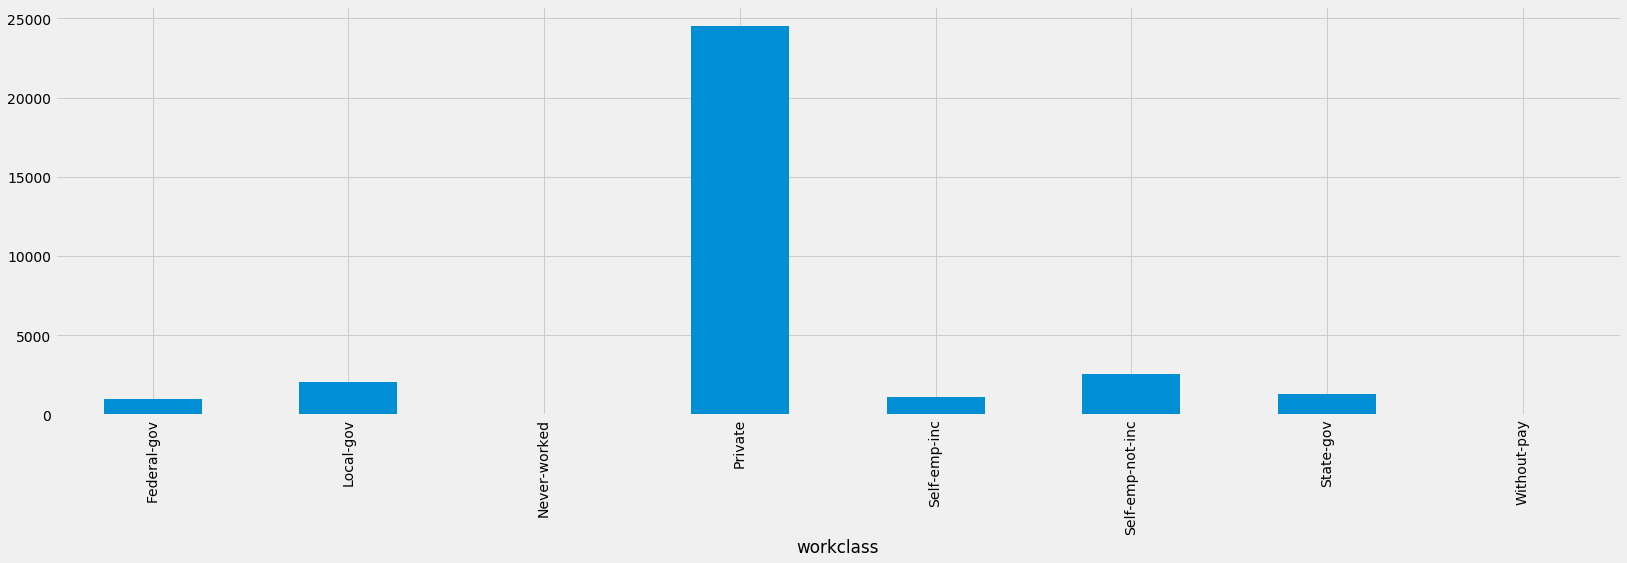

In [120]:
#Visualizing attributes within the dataset
df.groupby(["workclass"]).size().plot(kind="bar",fontsize=14)

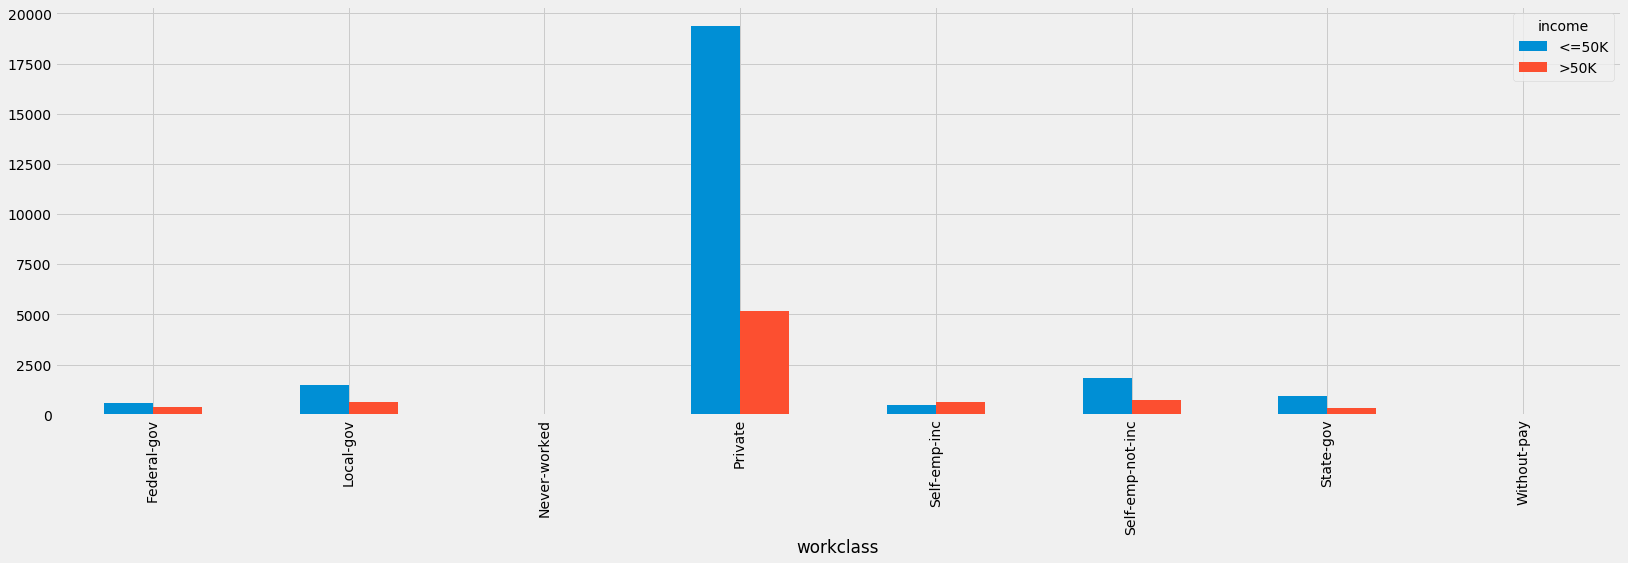

In [121]:
df.groupby(["income","workclass"]).size().unstack("income").plot(kind="bar",fontsize=14)

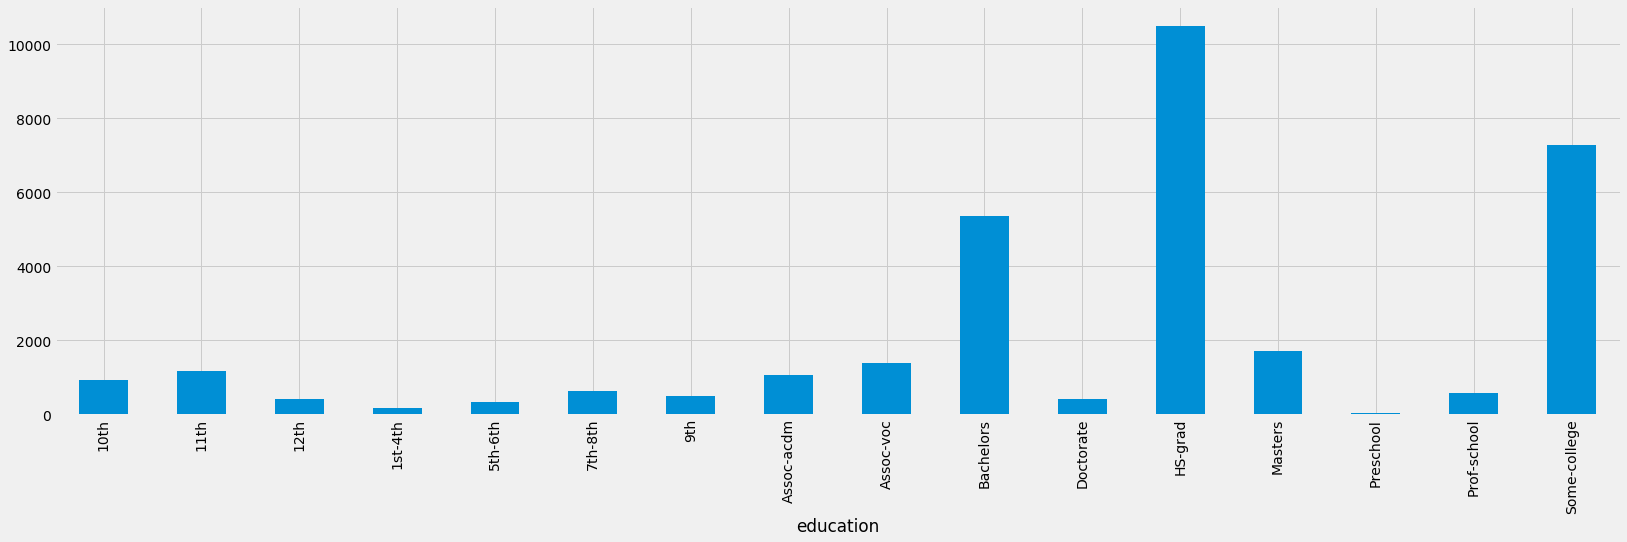

In [122]:
df.groupby(["education"]).size().plot(kind="bar",fontsize=14)

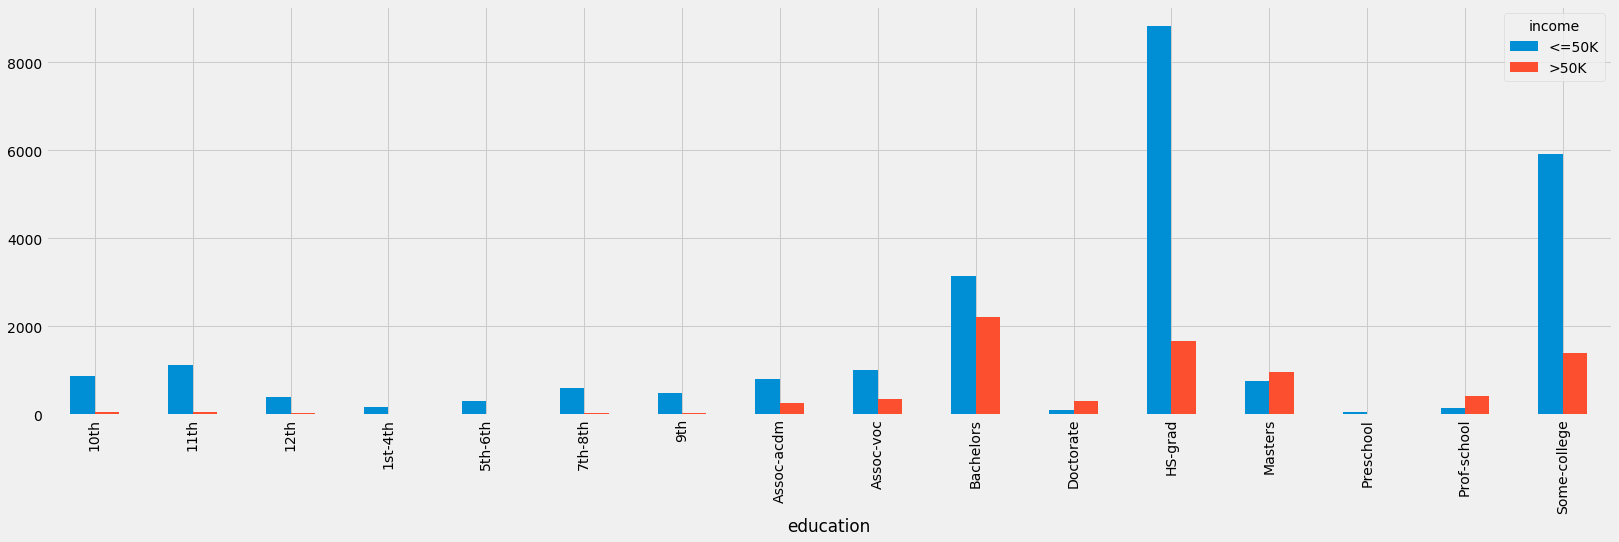

In [123]:
df.groupby(["income","education"]).size().unstack("income").plot(kind="bar",fontsize=14)

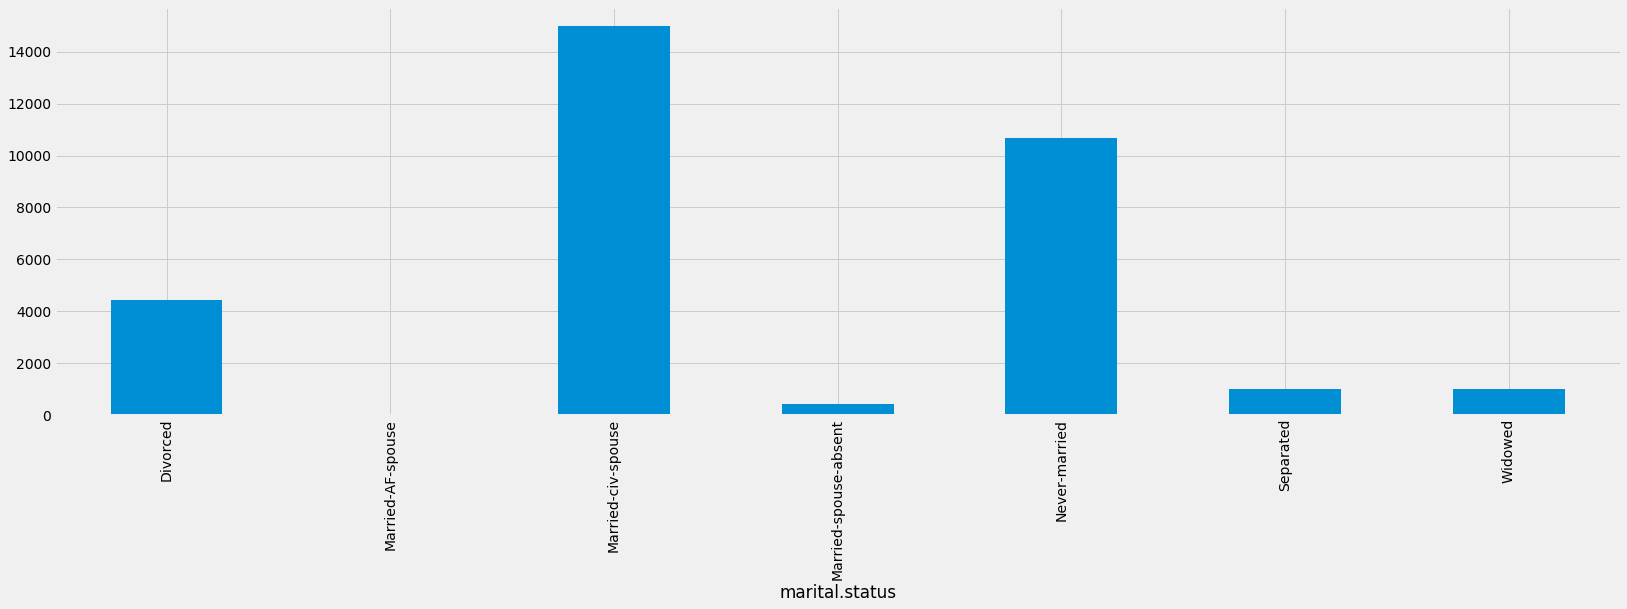

In [124]:
 df.groupby(["marital.status"]).size().plot(kind="bar",fontsize=14)

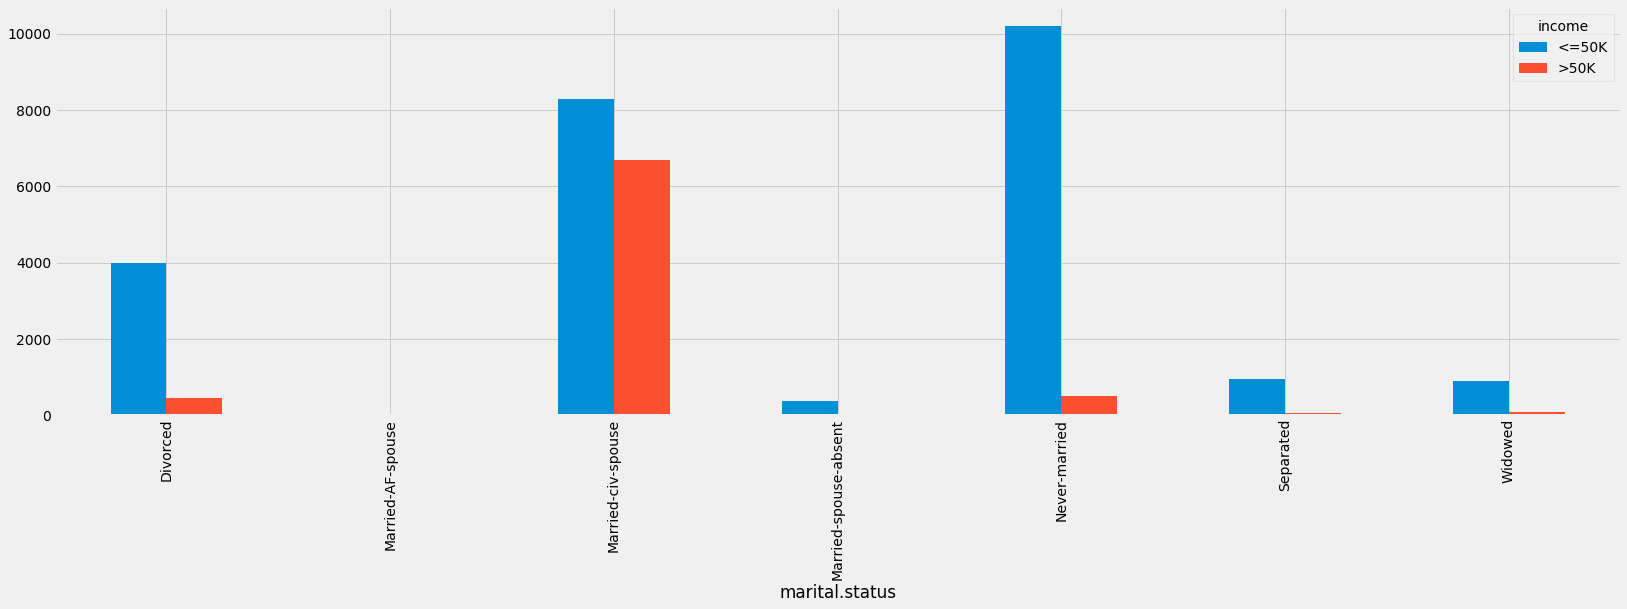

In [125]:
df.groupby(["income","marital.status"]).size().unstack("income").plot(kind="bar",fontsize=14)

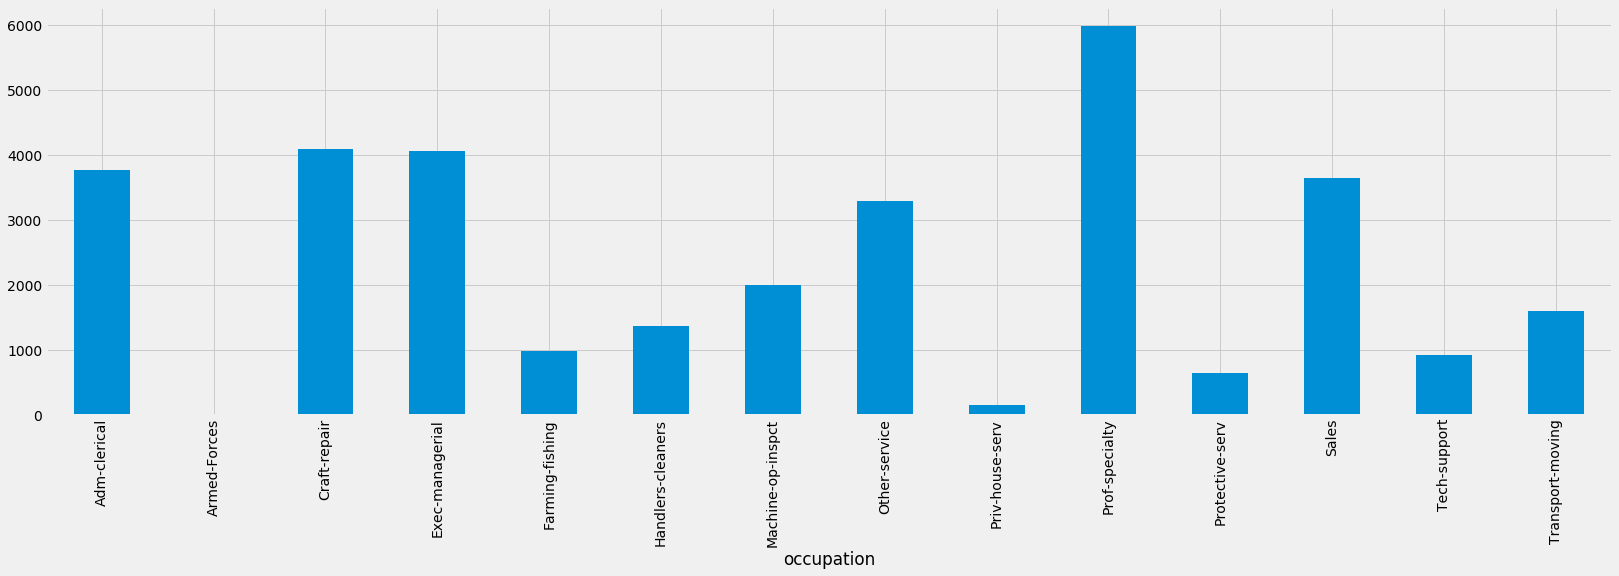

In [126]:
df.groupby(["occupation"]).size().plot(kind="bar",fontsize=14,x=df.groupby(["occupation"]).size(),y=df[["occupation"]])

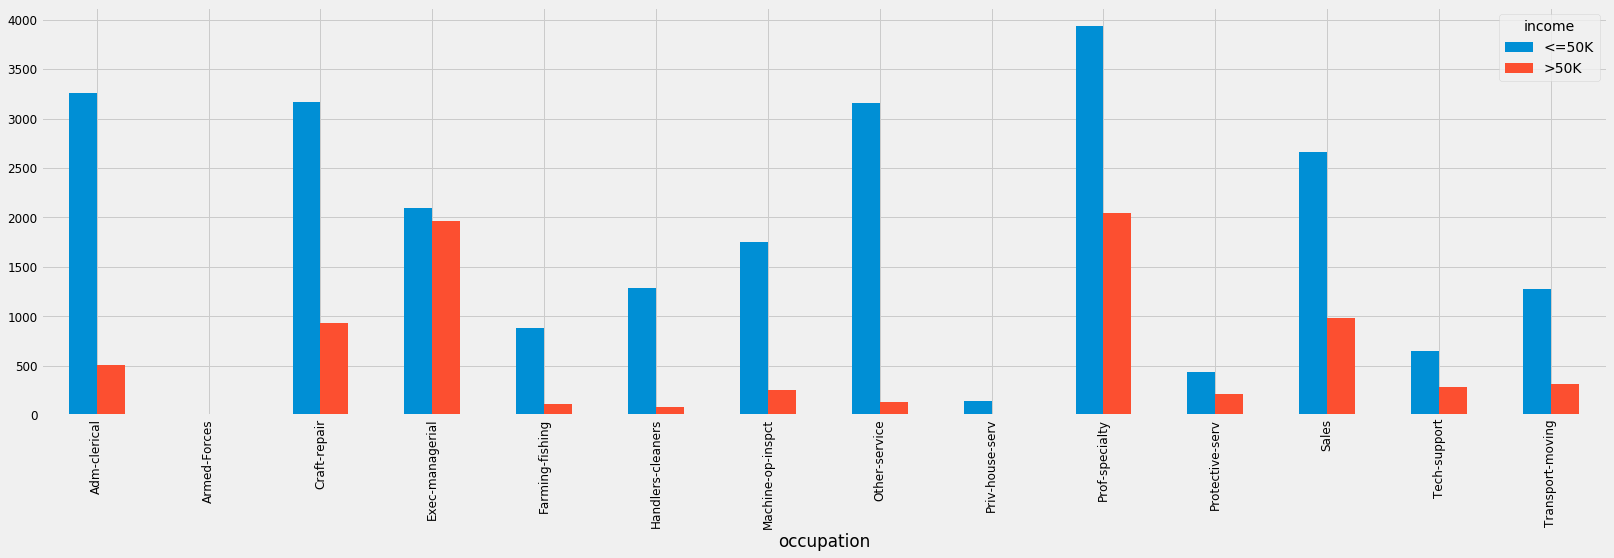

In [127]:
df.groupby(["income","occupation"]).size().unstack("income").plot(kind="bar",fontsize=12)

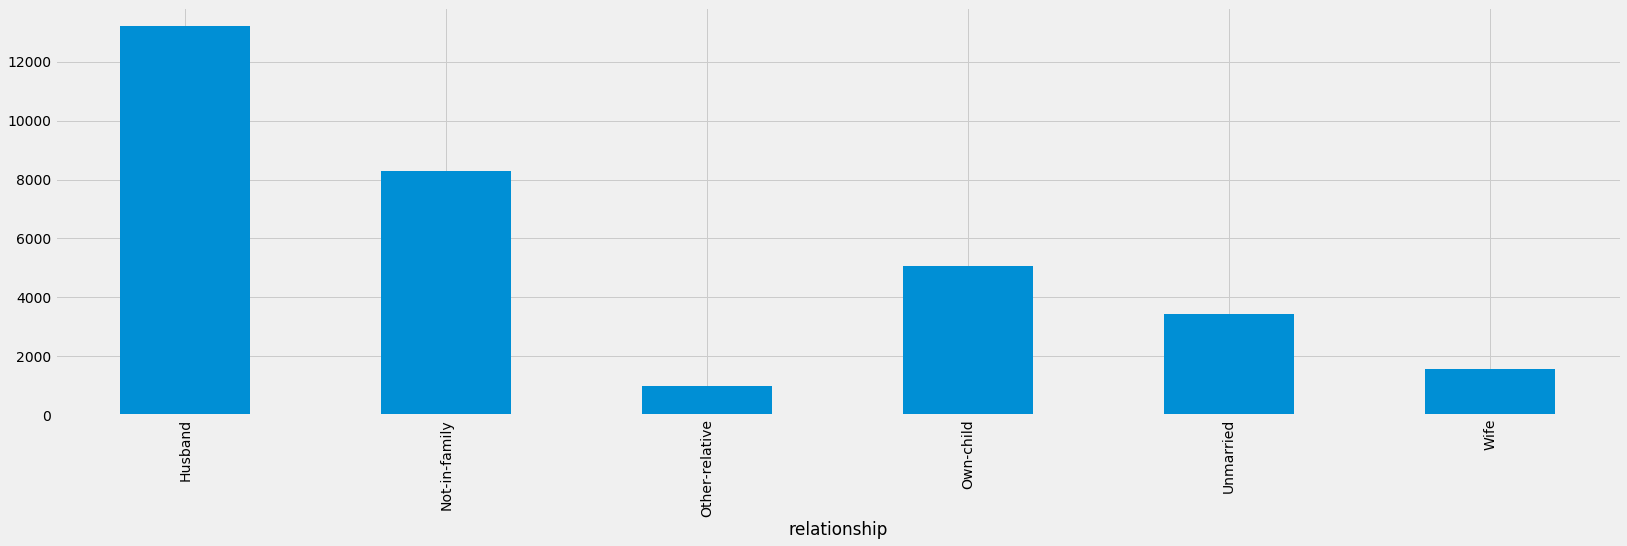

In [128]:
df.groupby(["relationship"]).size().plot(kind="bar",fontsize=14)

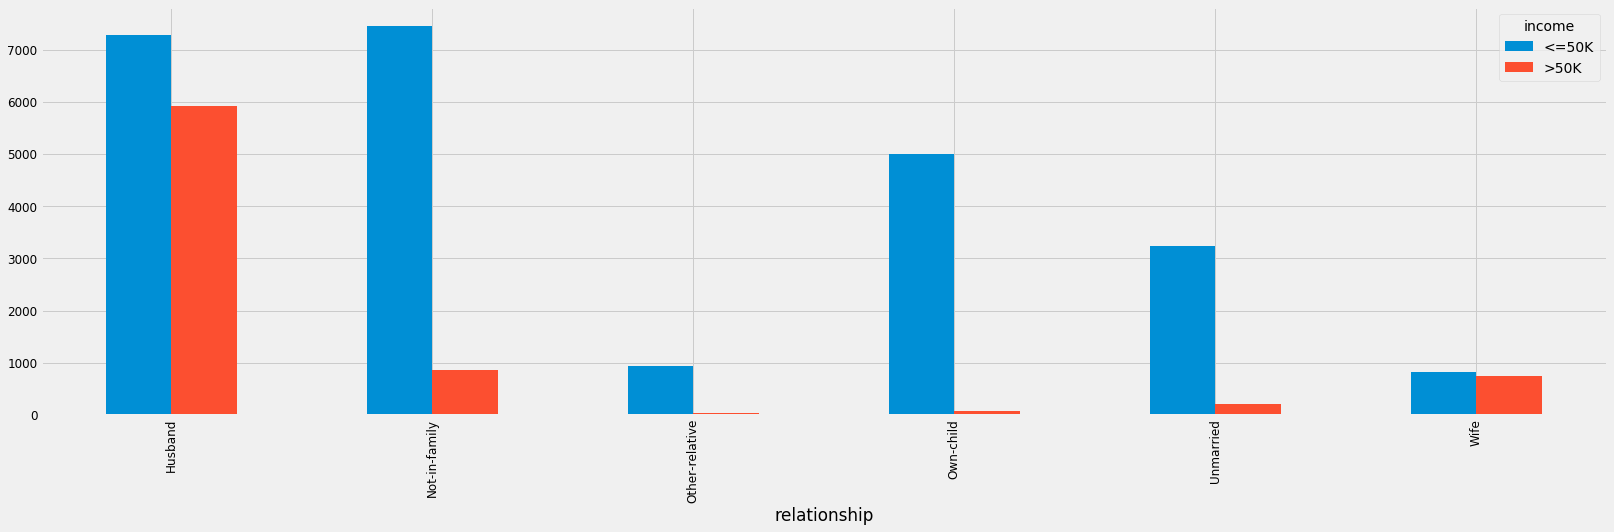

In [129]:
df.groupby(["income","relationship"]).size().unstack("income").plot(kind="bar",fontsize=12)

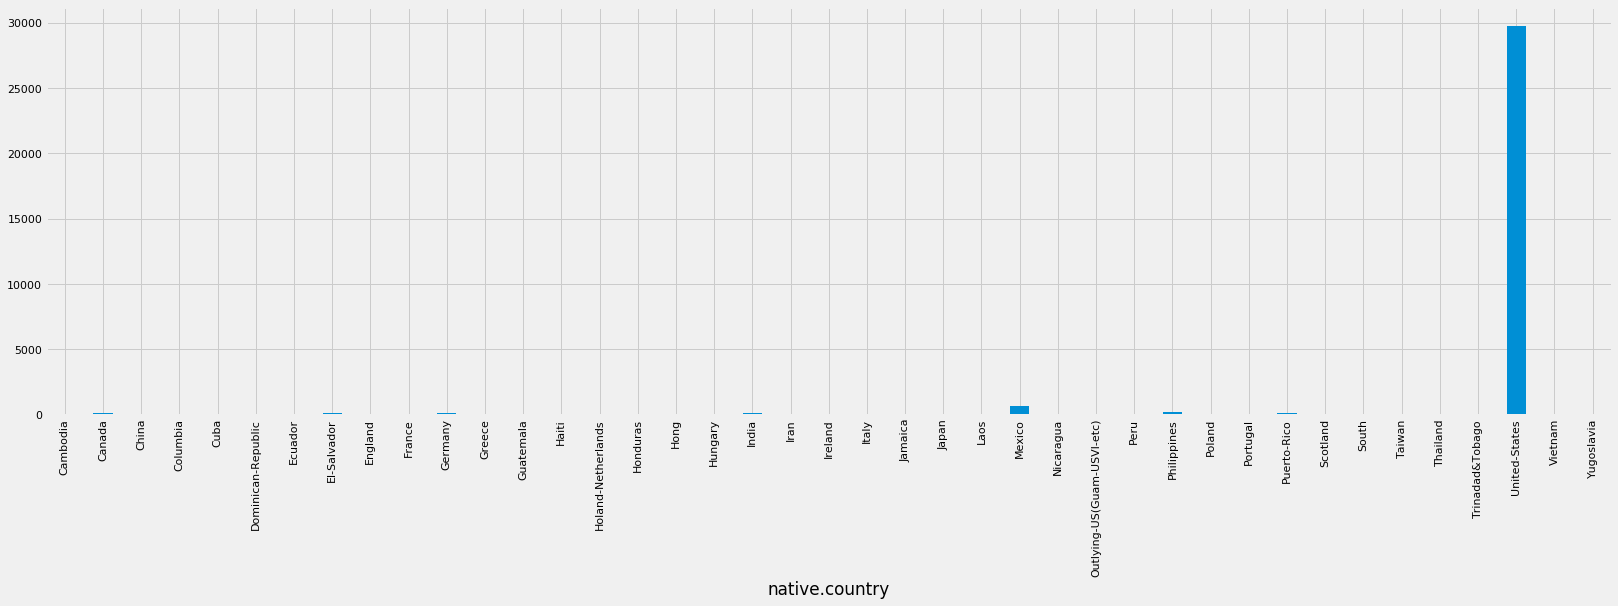

In [130]:
df.groupby(["native.country"]).size().plot(kind="bar",fontsize=11)

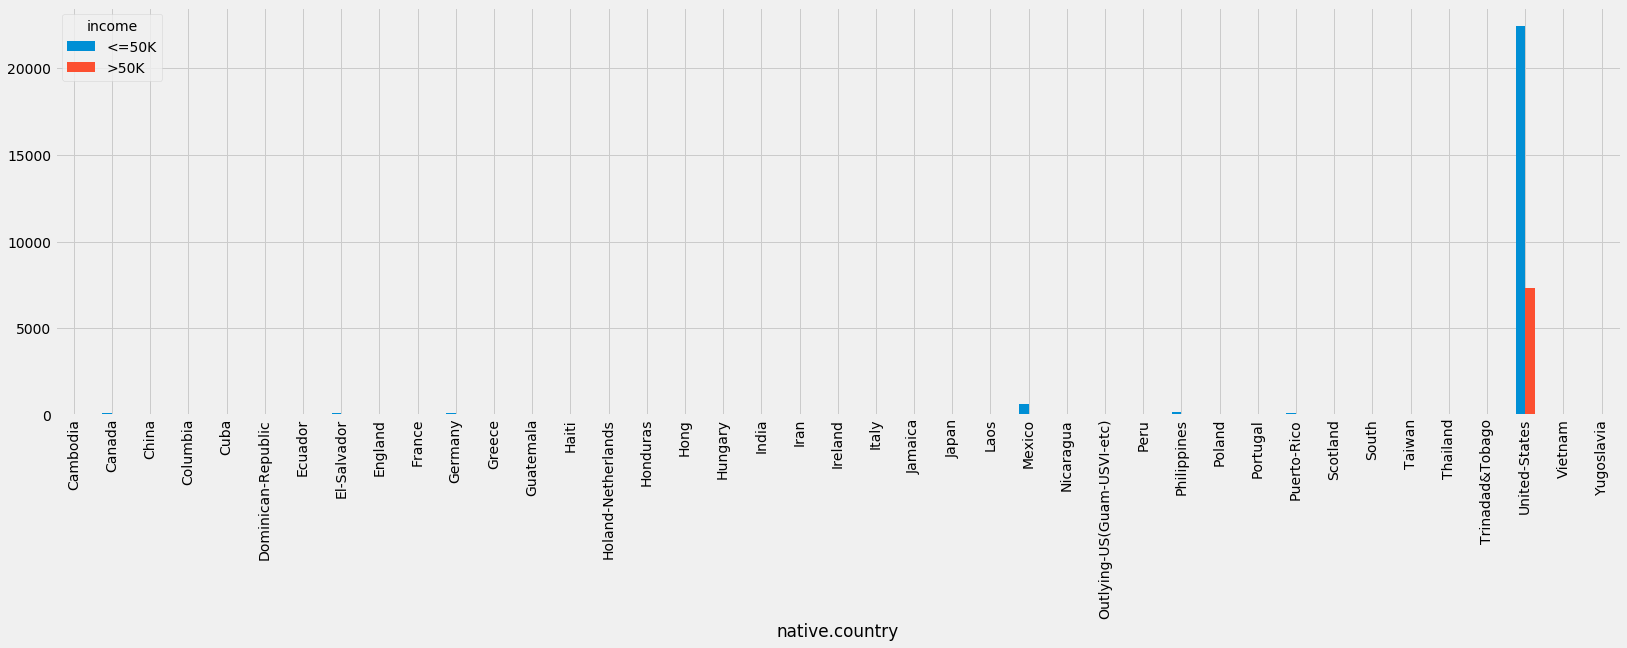

In [131]:
df.groupby(["income","native.country"]).size().unstack("income").plot(kind="bar")

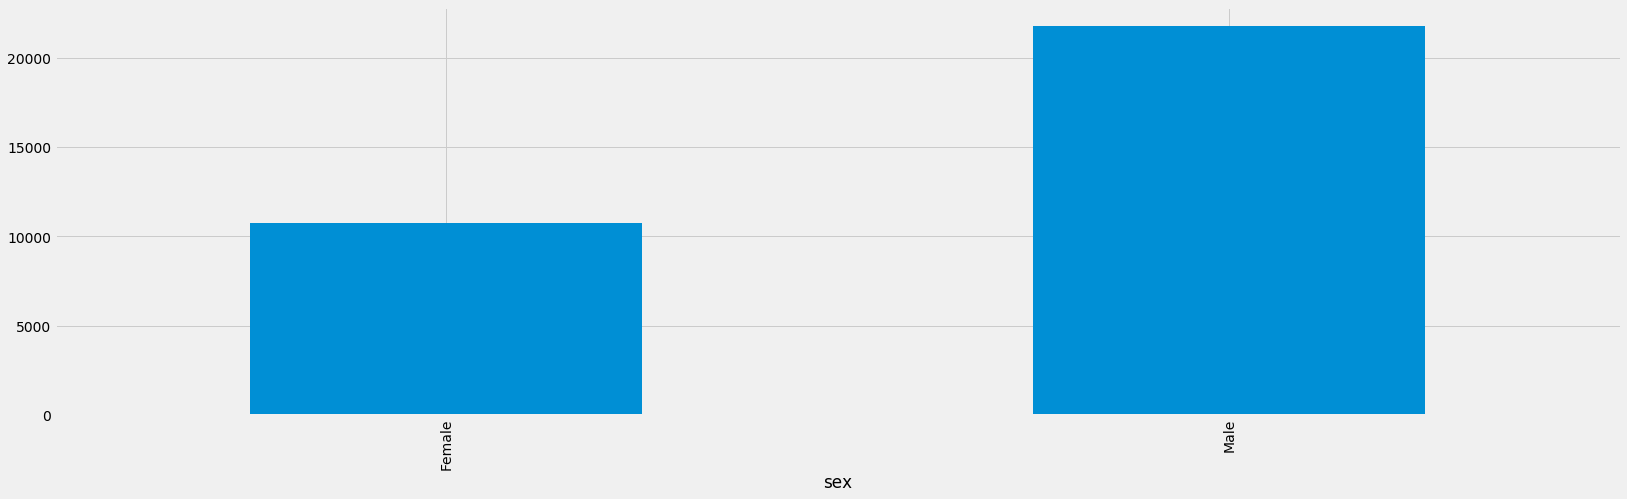

In [132]:
df.groupby(["sex"]).size().plot(kind="bar",fontsize=14)

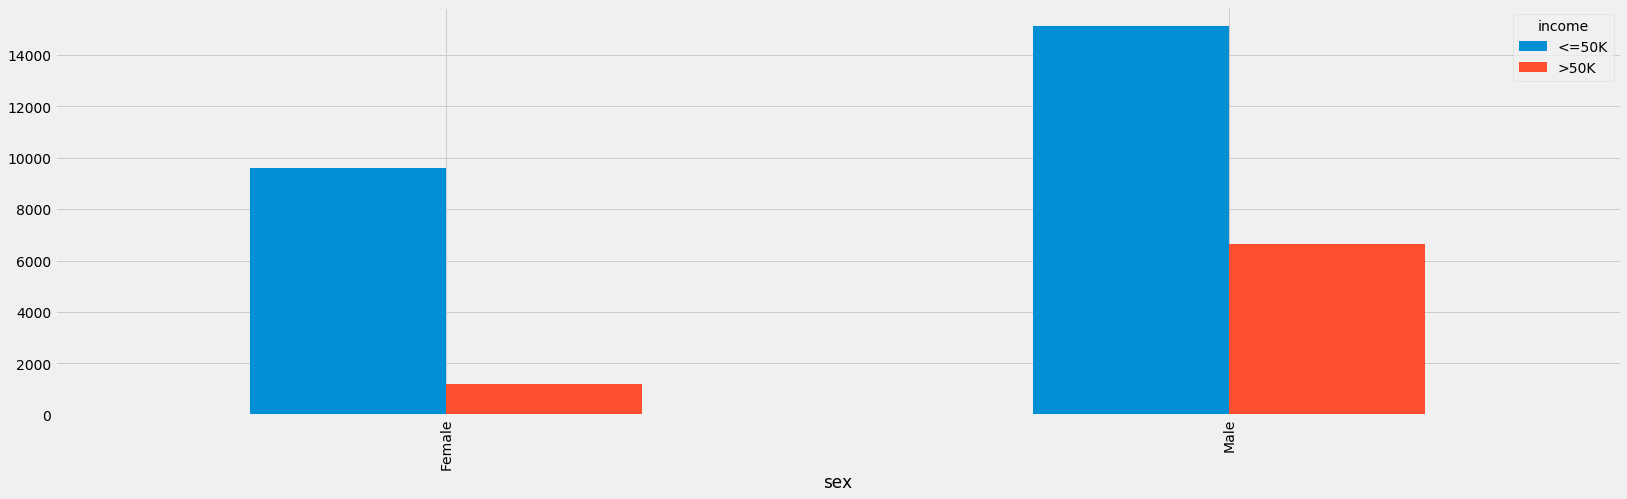

In [133]:
df.groupby(["income","sex"]).size().unstack("income").plot(kind="bar")

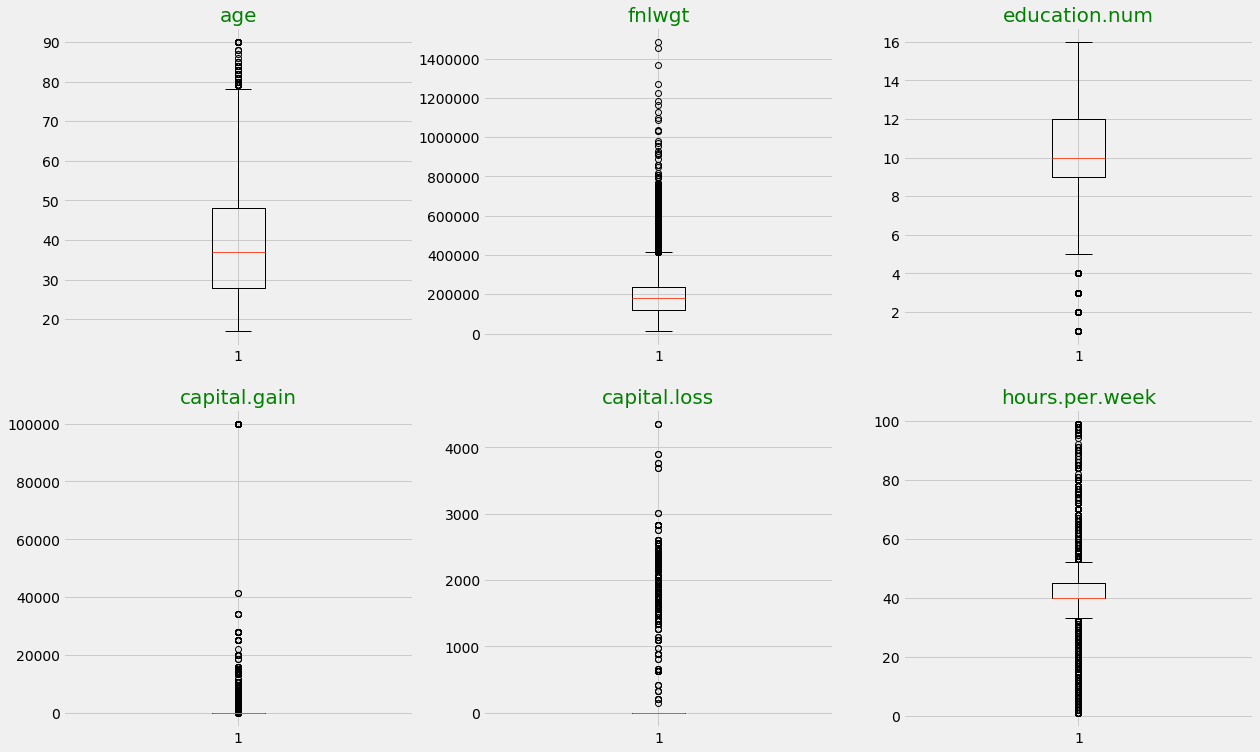

In [134]:
#Checking for outliers
plt.figure(figsize=(19,12))


num_feat = df.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_feat[i]])
    plt.title(num_feat[i],color="g",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)


plt.show()

In [135]:
#Removing the outliers
from scipy.stats.mstats import winsorize
df["age"]           = winsorize(df["age"],(0,0.15))
df["fnlwgt"]        = winsorize(df["fnlwgt"],(0,0.15))
df["capital.gain"]  = winsorize(df["capital.gain"],(0,0.099))
df["capital.loss"]  = winsorize(df["capital.loss"],(0,0.099))
df["hours.per.week"]= winsorize(df["hours.per.week"],(0.12,0.18))

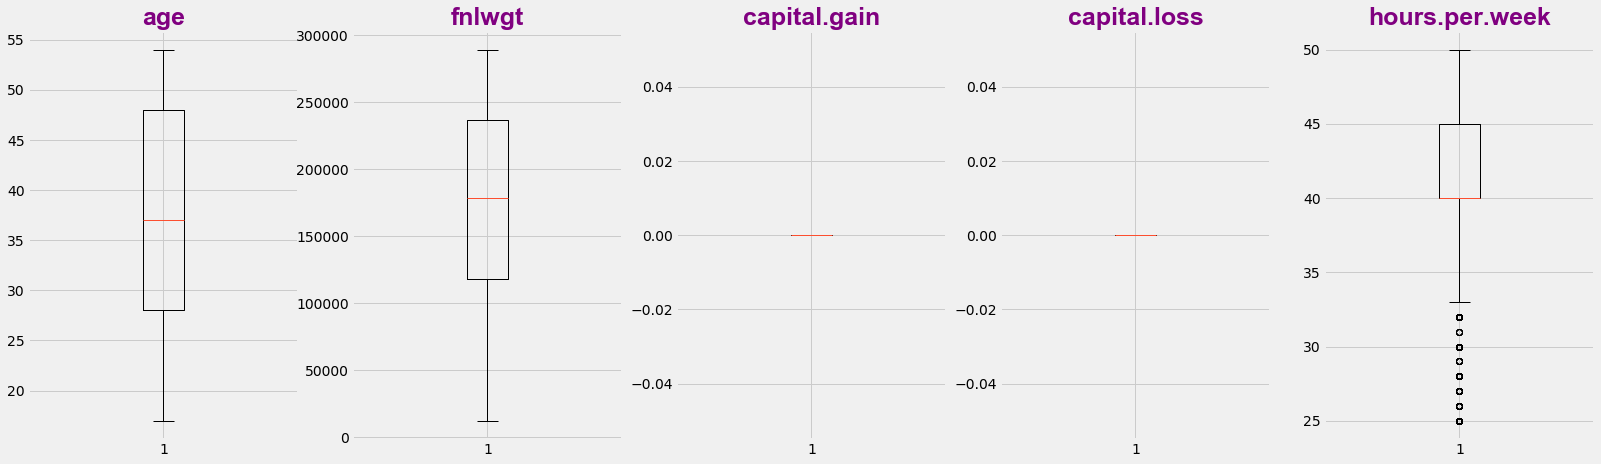

In [136]:
#Validating the removal of the outliers
plt.rcParams['figure.figsize'] = (25,7)

baslik_font = {'family':'arial','color':'purple','weight':'bold','size':25}

col_list=['age',"fnlwgt",'capital.gain', 'capital.loss', 'hours.per.week']

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.boxplot(df[col_list[i]])
    plt.title(col_list[i],fontdict=baslik_font)

plt.show()

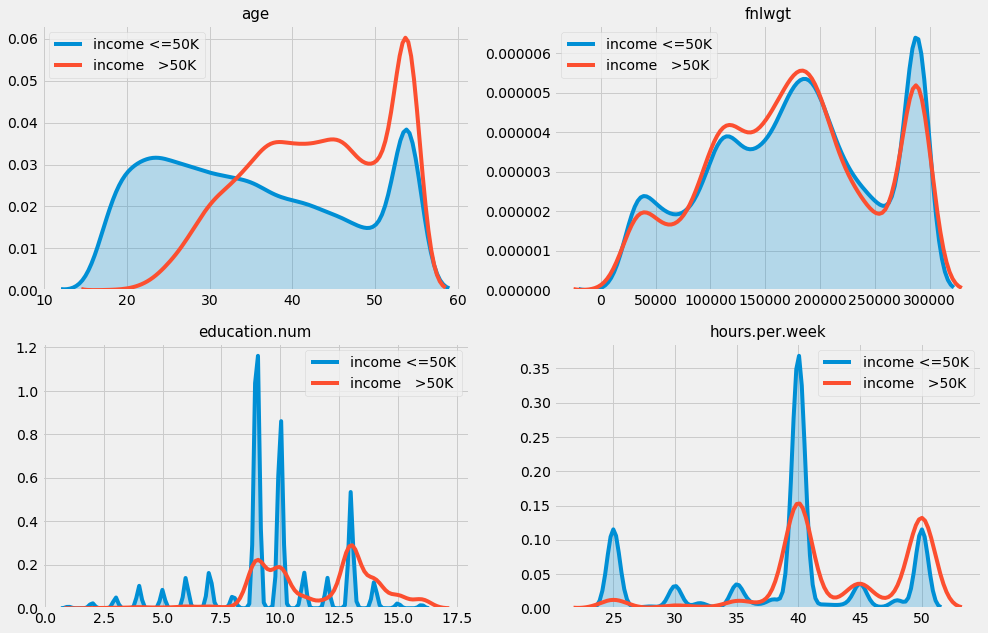

In [137]:
#Plotting the numerical values against income
con_var=['age', 'fnlwgt', 'education.num','hours.per.week']
plt.figure(figsize=(15,10))
plt.subplot(221)

i=0
for x in con_var:
    plt.subplot(2, 2, i+1)
    i += 1
    ax1=sns.kdeplot(df[df['income'] == '<=50K'][x], shade=True,label="income <=50K")
    sns.kdeplot(df[df['income'] == '>50K'][x], shade=False,label="income   >50K", ax=ax1)
    plt.title(x,fontsize=15)

plt.show()

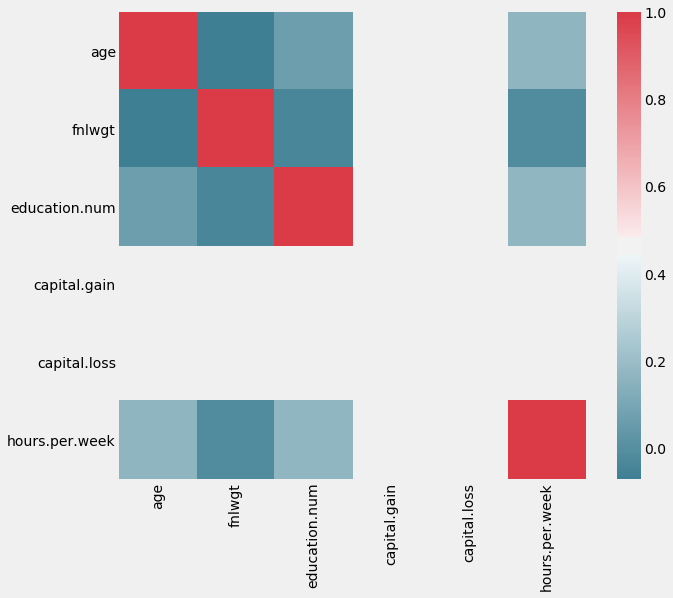

In [138]:
#Plotting for Correlation
f,ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

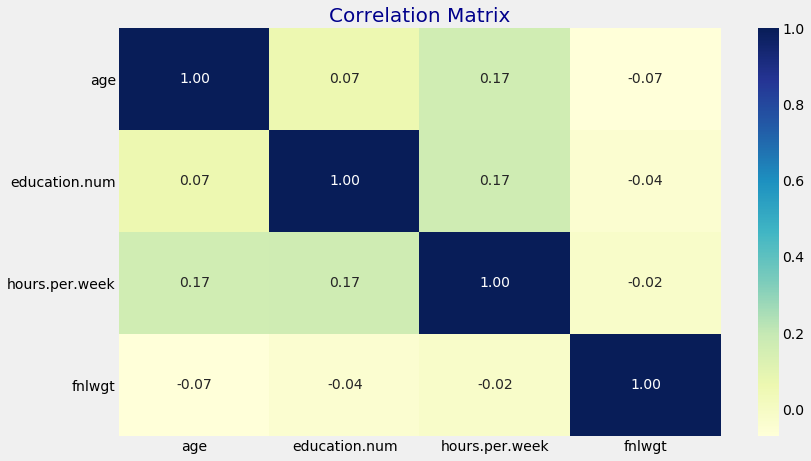

In [139]:
list=['age','education.num',"hours.per.week","fnlwgt"]
plt.figure(figsize=(12,7))
sns.heatmap(df[list].corr(),annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.title("Correlation Matrix",color="darkblue",fontsize=20)
plt.show()

In [140]:
#Encoding the categorical attributes using dummy encoding
df["woman?"]  = df.sex.replace({"Female":1,"Male":0})
df["income_"] = df.income.replace({"<=50K":0,">50K":1})
df1 = pd.get_dummies(df['workclass'])
df2 = pd.get_dummies(df["education"])
df3 = pd.get_dummies(df["marital.status"])
df4 = pd.get_dummies(df["occupation"])
df5 = pd.get_dummies(df["relationship"])
df6 = pd.get_dummies(df["race"])
df7 = pd.get_dummies(df["native.country"])
df  = pd.concat([df,df1,df2,df3,df4,df5,df6,df7],axis=1)

In [141]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,54,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,0,0,0,0,0,0,0,1,0,0
1,54,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,0,0,1,0,0
2,54,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,0,0,0,0,1,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,0,1,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,0,0,1,0,0


>50K  rate : %24.08
<=50K rate : %75.92


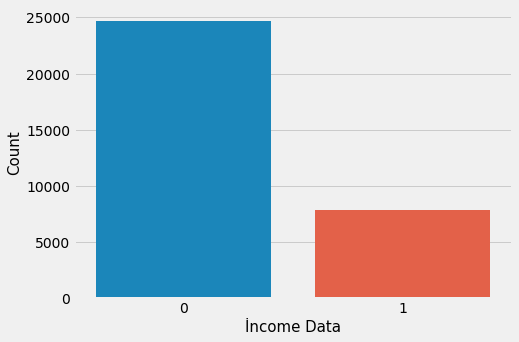

In [142]:
#Plotting the income data
plt.figure(figsize=(7,5))
sns.countplot(df["income_"])
plt.xlabel("İncome Data",fontsize=15)
plt.ylabel("Count",fontsize=15)
print(">50K  rate : %{:.2f}".format(sum(df["income_"])/len(df["income_"])*100))
print("<=50K rate : %{:.2f}".format((len(df["income_"])-sum(df["income_"]))/len(df["income_"])*100))

#Checking for the attributes present now
pd.options.display.max_seq_items = None
df.columns

In [143]:
#Dropping the original categorical attributes and splitting the dataset into training and test datasets 
from sklearn.model_selection import train_test_split
dataX = df.copy().drop(['workclass','education','marital.status','occupation','relationship','race','native.country','income','income_','sex'],axis=1)
dataY = df['income_'].copy()
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(dataX,dataY,
                                                   test_size=0.25,
                                                   random_state=10,
                                                   stratify=df['income_'])

In [144]:
#Applying Gaussian Naives Bayes model for classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB()
gnb.fit(X_train_c, y_train_c)
target_pred = gnb.predict(X_test_c)
cm_gnb = confusion_matrix(y_test_c, target_pred)

In [145]:
#Checking for accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test_c, target_pred, normalize = True)

0.8021127625598821

In [146]:
#Plotting the confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

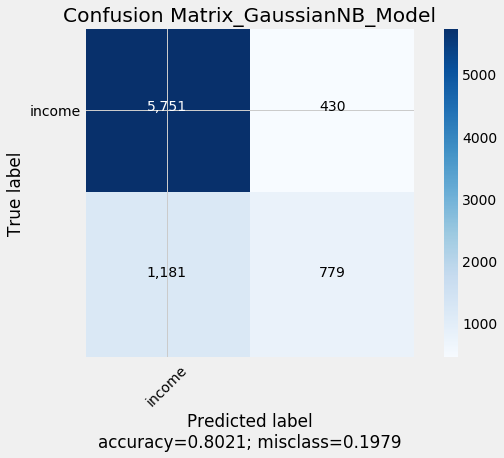

In [147]:
plot_confusion_matrix(cm_gnb,
                      normalize    = False,
                      target_names = ['income'],
                      title        = "Confusion Matrix_GaussianNB_Model")

82.53093642790876

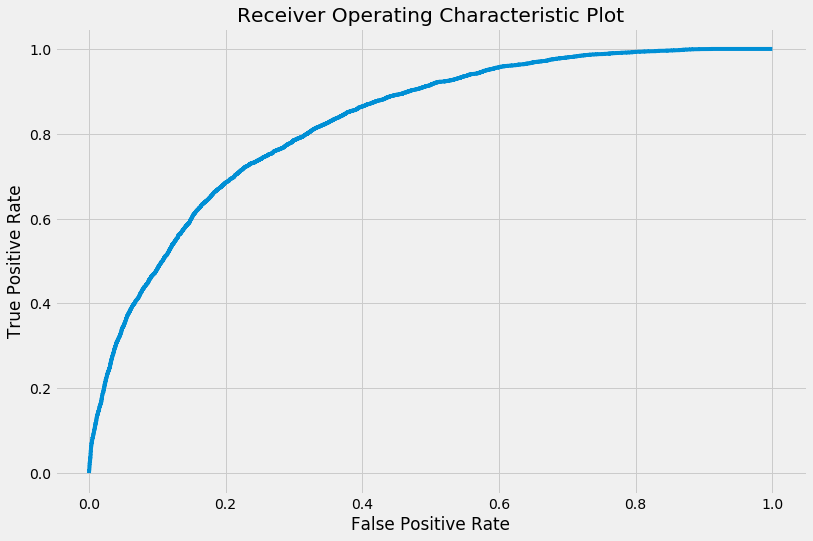

In [148]:
#Plotting the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thr = roc_curve(y_train_c, gnb.predict_proba(X_train_c)[:,1])
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
auc(fpr, tpr) * 100

In [149]:
#Applying Bernoulli Naives Bayes classification model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train_c, y_train_c)
target_pred = bnb.predict(X_test_c)
cm_bnb = confusion_matrix(y_test_c, target_pred)

In [150]:
#Checking for the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test_c, target_pred, normalize = True)

0.759611841297138

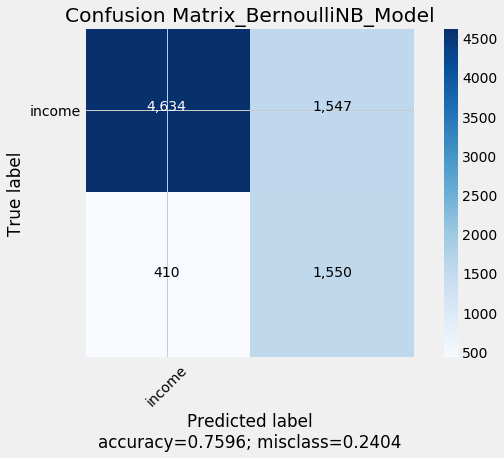

In [151]:
plot_confusion_matrix(cm_bnb,
                      normalize    = False,
                      target_names = ['income'],
                      title        = "Confusion Matrix_BernoulliNB_Model")

86.0423540922692

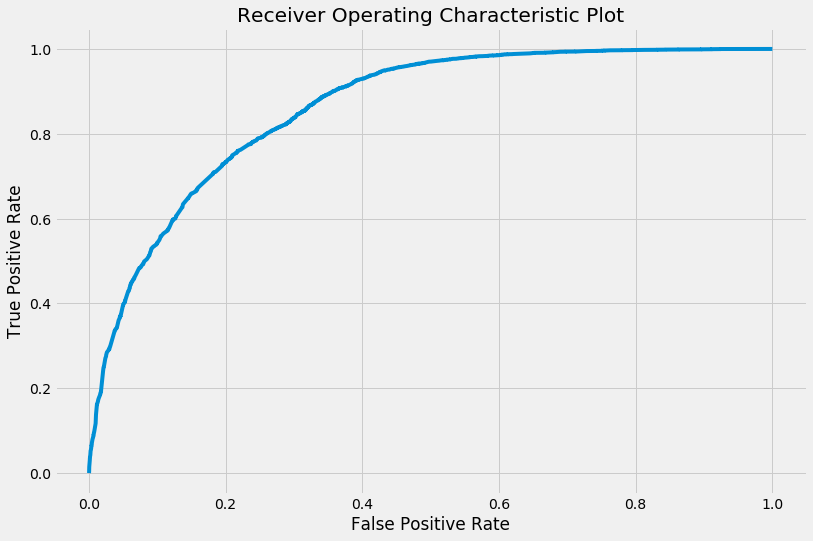

In [152]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thr = roc_curve(y_train_c, bnb.predict_proba(X_train_c)[:,1])
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
auc(fpr, tpr) * 100

In [153]:
# Applying XGB for feature selection
import xgboost as xgb
from sklearn.model_selection import cross_val_score
# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()
# cross validation score
cv_scores = cross_val_score(xgb_cl, dataX, dataY, scoring='roc_auc', cv=3)
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))
# fit the model
xgb_cl.fit(X_train_c, y_train_c)

3-Fold AUC: 0.8924650528070036


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

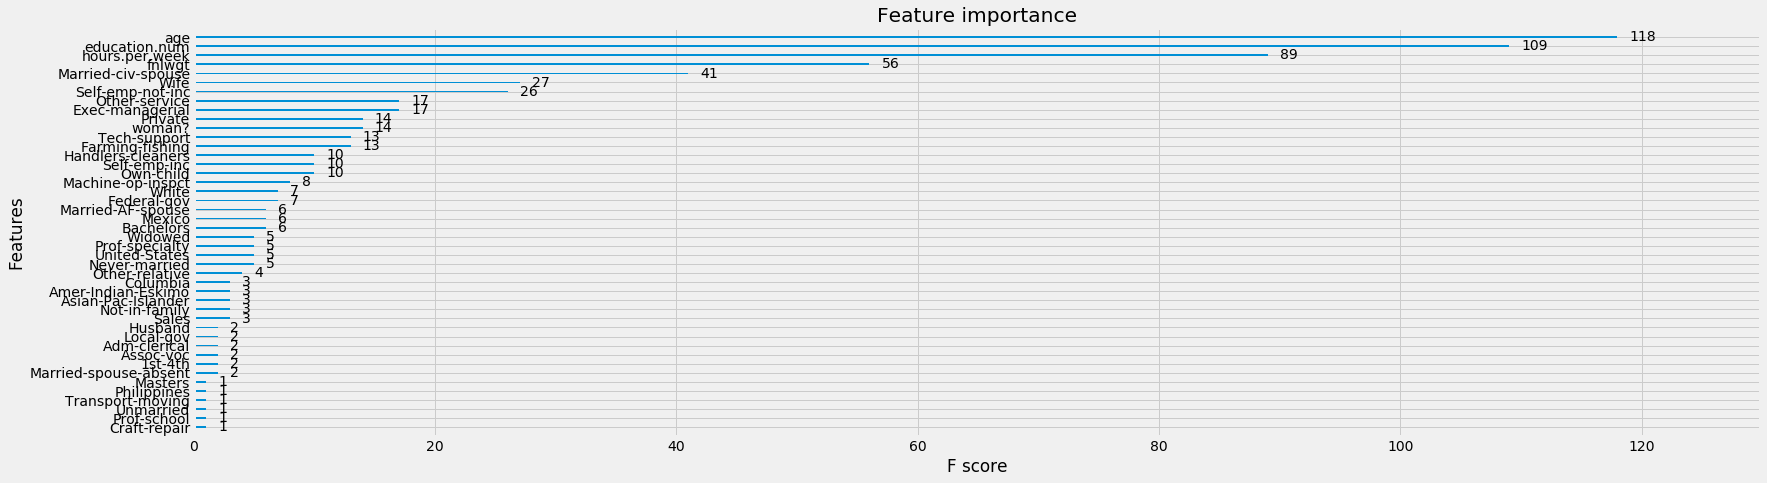

In [154]:
#Plotting the top features
plt.style.use('fivethirtyeight')
xgb.plot_importance(xgb_cl)

In [155]:
# Fit GaussianNV model using each importance as a threshold
from sklearn.feature_selection import SelectFromModel
from numpy import sort
thresholds = sort(xgb_cl.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_cl, threshold=thresh, prefit=True)
    select_X_train_im = selection.transform(X_train_c)
    # train model
    selection_model = GaussianNB()
    selection_model.fit(select_X_train_im, y_train_c)
    # eval model
    select_X_test = selection.transform(X_test_c)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_c, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train_im.shape[1], accuracy*100.0))

Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000, n=104, Accuracy: 80.21%
Thresh=0.000

In [156]:
# Fit BernoulliNB model using each importance as a threshold
from sklearn.feature_selection import SelectFromModel
from numpy import sort
thresholds = sort(xgb_cl.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_cl, threshold=thresh, prefit=True)
    select_X_train_im = selection.transform(X_train_c)
    # train model
    selection_model = BernoulliNB()
    selection_model.fit(select_X_train_im, y_train_c)
    # eval model
    select_X_test = selection.transform(X_test_c)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_c, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train_im.shape[1], accuracy*100.0))

Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000, n=104, Accuracy: 75.96%
Thresh=0.000

In [ ]:
#Visualizing decision boundary
# We will take 1st two features and draw the boundary between them

from matplotlib.colors import ListedColormap

X_set, y_set = X_train_c.head(1000), y_train_c.head(1000)
decision_features_train =X_set[['age','fnlwgt']].copy()
learner_db = GaussianNB()
learner_db.fit((decision_features_train), y_set)
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, learner_db.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


In [ ]:
#Visualising the Training set results

X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.05),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.05))
plt.contourf(X1, X2, learner_db.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
decision_features_train.to_numpy()
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(decision_features_train.iloc[y_set == j, 0], decision_features_train.iloc[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('GaussianNB (Training set)')
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.legend()
plt.show()

In [ ]:
#Visualising the Test set results

X_set, y_set = X_test_c, y_test_c
decision_features_test =X_set[['age','fnlwgt']].copy()
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.05),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.05))
plt.contourf(X1, X2, learner_db.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
decision_features_test.to_numpy()
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(decision_features_test.iloc[y_set == j, 0], decision_features_test.iloc[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('GaussianNB (Test set)')
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.legend()
plt.show()